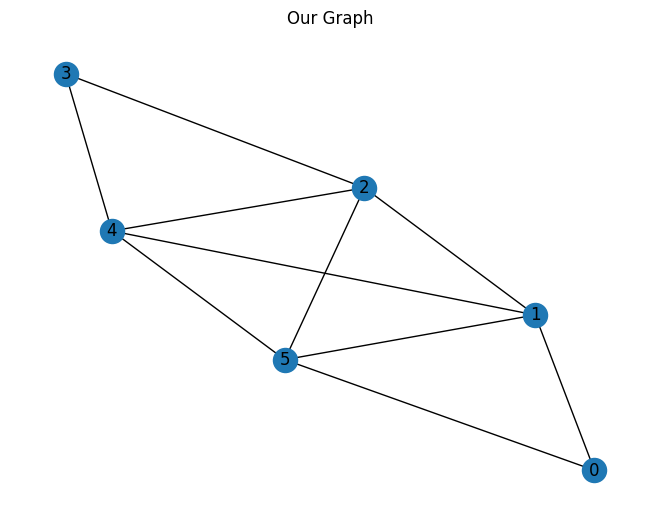

('Trail is eulerian, returned trail is: ', [0, 5, 1, 2, 4, 5, 2, 3, 4, 1, 0])


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#A list of edges with the follow structure (vertex1, vertex2, flag (t/f))
edge_list = [] #A list of all edges in the graph
vertex_incident_list = [] #A list of lists, where each sub-list is a incidence list for that index (ie vertex)
vertex_pointer_list = [] #Realistically could be simply appened to the incident list, but easier to understand/explain if separated
is_directed = False

#v1 and v2 are vertices, if program is flagged for directional = true then
#v2 is destination of edge (v1 origin)
def add_edge(v1, v2):

  #Adds positions for the vertice incident lists dynamically
  while (max(v1, v2) >= len(vertex_incident_list)):
    vertex_incident_list.append([])

  #Adds an edge to the edge list (set)
  e = (v1, v2, False)
  edge_list.append(e)

  #WHat we want is not a copy of the edge, but the location that the edge is loacted
  #Hence why we are getting the "fixed" index position of the edge (basically the last item since)
  #We just appended it.
  vertex_incident_list[v1].append(len(edge_list)-1)
  vertex_incident_list[v2].append(len(edge_list)-1)

#Generates the initial pointer list for the vertices
def generate_pointer_list():
  for each in (vertex_incident_list):
    vertex_pointer_list.append(0)


#Returns a list of odd-degree vertices
def get_odd_degrees():
  odds = []
  v = vertex_incident_list
  for x in range(len(v)):
    if(len(v[x])%2 == 1):
      odds.append(x)
  return odds

#Returns the count on the number of odd vertices (returns a -1 if there is an invalid number of odd vertices, 0 if all deg(v) are even)
def count_odds():
  n = len(get_odd_degrees())
  if(n == 2):
    return 2
  elif(n != 0):
    return -1
  else:
    return 0

#Finds an unused incident edge for v
def get_incident_edge(v):
  incident_edges = vertex_incident_list[v] #acquires list of the (location in the array) of the incident edges of v
  vertex_pointer_list[v] #gets the current pointer
  num_edges = len(incident_edges)

  while(vertex_pointer_list[v] <= num_edges):
    if(vertex_pointer_list[v] == num_edges):
      return -1 #flags that the end of the list was reached and there are no available edges

    lookup = incident_edges[vertex_pointer_list[v]]
    if(edge_list[lookup][2] == False):
      edge_list[lookup] = (edge_list[lookup][0], edge_list[lookup][1], True) #Copies the new edge info (tuples aren't mutable in python so you have to replace it)
      vertex_pointer_list[v]+=1
      return lookup
    else:
      vertex_pointer_list[v]+=1

#e is edge location in lost, v is vertex on stack calling edge (eg "origin vertex")
#If the vertex calling the edge is the first position vertex return the other vertex and vica versa
def get_destination_vertex(e, v):
  our_edge = edge_list[e]
  if(our_edge[0] == v):
    return our_edge[1]
  else:
    return our_edge[0]

#Finds an initial vertex to use to put on the current_stack
def get_initial_vertex():
  if(is_directed == False):
    num_odds = count_odds()
    #Will return a -1 flag to the euler_finder to prevent it going through the process of building a trial
    #Essentially tells the finder that the graph does not meet the requirements
    if(num_odds != 2 and num_odds != 0):
      return -1
    elif(num_odds == 2):
      x = np.random.choice(get_odd_degrees())
      print("Initial vertex return is: ", x)
      return x
    else:
      return np.random.randint(len(vertex_incident_list)-1) #randint is inclusive so must be -1

#Confirms the algo actually found all of the edges, O(E)
def confirm_all_edges_taken():
  all_true = True
  for x in range(len(edge_list)):
    if edge_list[x][2] != True:
      all_true = False
      return all_true
  return all_true

#Finds euler trail if it exists, does throw a message if it cannot due to
def euler_trail_finder():
  intial_vertex = get_initial_vertex()
  if(intial_vertex == -1):
    return "Graph has wrong number of odd degree vertices, no eulerian trail found"
  current_stack = []
  current_stack.append(intial_vertex) #Pushes the first vertex onto the stack
  euler_trail = []

  while(current_stack):
    #Continues while the current stack is not empty
    edge_location = get_incident_edge(current_stack[-1]) #current_stack[-1] is essentially a .peek()
    if(edge_location == -1): #Means that there are no more edges available for v
      euler_trail.append(current_stack.pop())
    else:
      current_stack.append(get_destination_vertex(edge_location, current_stack[-1]))

  #The trail is still valid if not reversed for undirected, but the reversed list
  #is simply more intuitive as it shows the "actual" traversal order
  euler_trail.reverse()
  return euler_trail

def confirm_euler_trail_found(t):
  trail = t
  if(confirm_all_edges_taken() == False):
    return ("Edges are missing from trail, returned trail was: ", trail)
  else:
    return ("Trail is eulerian, returned trail is: ", trail)

#Simply displays the graph
def visual():
  num_v = len(vertex_incident_list)
  g = np.zeros([num_v, num_v])

  for x in range(len(edge_list)):
    v1 = edge_list[x][0]
    v2 = edge_list[x][1]
    g[v1][v2] = 1

  graph = nx.from_numpy_array(g)
  nx.draw(graph, with_labels = True)
  plt.title("Our Graph")
  plt.show()

#Simple Driver to Call needed functions
def driver():
  #Adding Edges to graph and sets up pointers
  add_edge(0, 5)
  add_edge(1, 5)
  add_edge(0, 1)
  add_edge(1, 2)
  add_edge(2, 4)
  add_edge(5, 4)
  add_edge(5, 2)
  add_edge(1, 4)
  add_edge(2, 3)
  add_edge(3, 4)
#  add_edge(5, 6)
#  add_edge(1, 7)

#  add_edge(6, 7)

  visual()


  generate_pointer_list()
  print(confirm_euler_trail_found(euler_trail_finder()))

driver()